In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/align_table/o1b47.GRCm39.digested.parquet"
cell_id = fpath.split("/")[-1].split(".")[0]

# get read_lengths
read_lengths = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/read_stats/{cell_id}.read_lengths.parquet"
rdf = pd.read_parquet(read_lengths)
rdf.columns = ['read_name', 'full_length']

# load digested alignments
digested = pd.read_parquet(fpath)
digested = pd.merge(digested, rdf, 
              how='left',
              left_on='read_name',
              right_on='read_name',)

print(f"{digested.shape=}")

# load raw alignments
fpath = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/align_table/{cell_id}.GRCm39.raw.parquet"
raw = pd.read_parquet(fpath)
raw = pd.merge(raw, rdf, 
              how='left',
              left_on='read_name',
              right_on='read_name',)

print(f"{raw.shape=}")

digested.shape=(4968407, 16)
raw.shape=(2693962, 16)


read_name='71653be0-0746-4bb2-a762-479fb4077454'


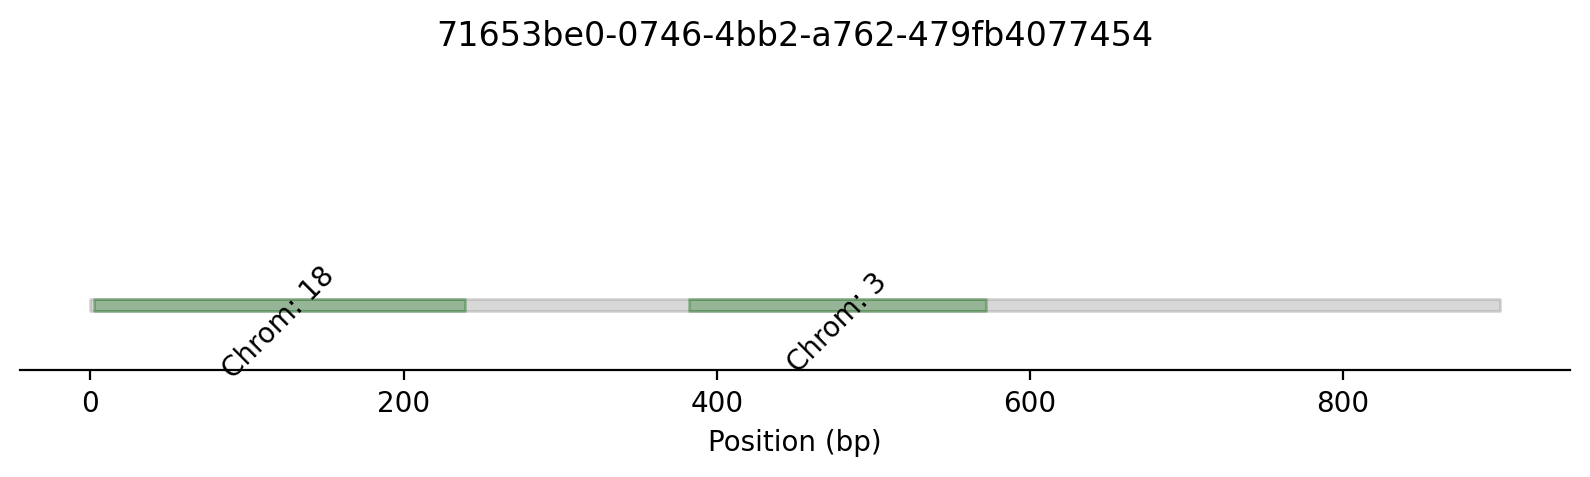

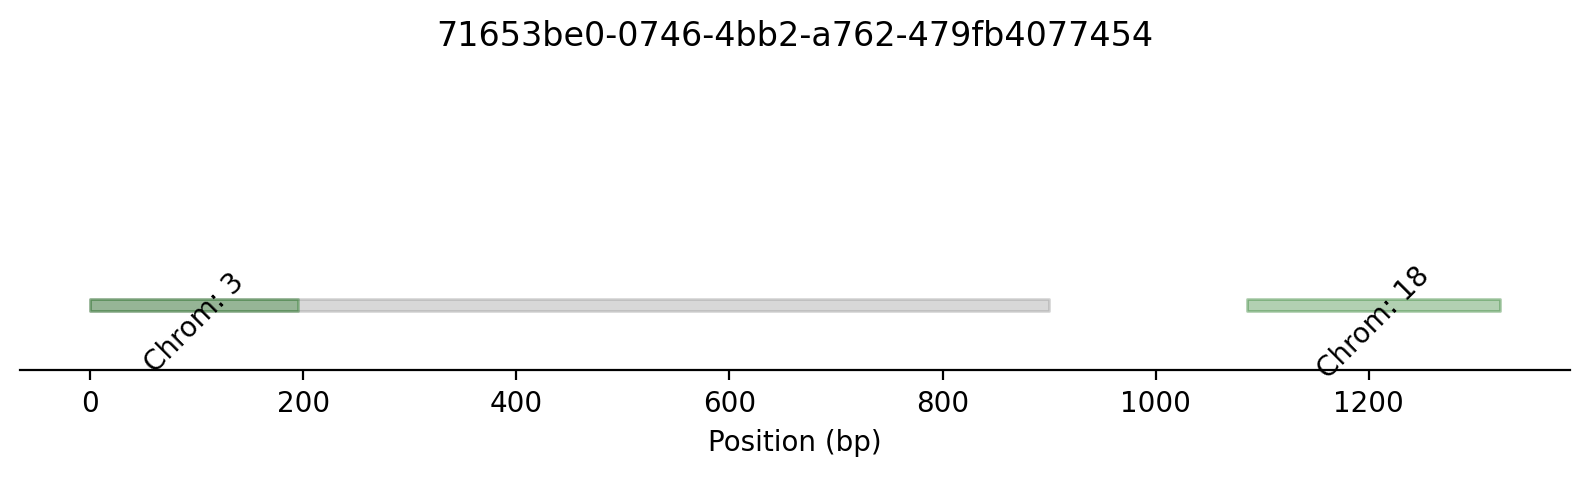

In [34]:
def _plot_rectanlge(ax, x1, y1, height, width, **kwargs):
    """A function to plot a rectanle """
    # Create the shaded rectangle
    plt.fill_between(
        [x1, x1 + width],  # x-coordinates for left and right edges
        y1,                 # bottom y-coordinate
        y1 + height,        # top y-coordinate (bottom + height)
        **kwargs         
    )
    

def plot_alignments(read_df, height=0.01, figsize=(10, 1), dpi=200):
    """A function to plot the read """
    # skinny-ness of bar
    plt.rcParams['figure.dpi'] = dpi
    plt.rcParams['figure.figsize'] = (10, 2)
    fig, ax = plt.subplots()

    read_length = read_df['full_length'].max()

    # plot the full read
    _plot_rectanlge(ax, 
                    x1=0, 
                    y1=0.05, 
                    height=height, 
                    width=read_length, 
                    color='grey', 
                    zorder=1,
                    alpha=0.3)

    # plot the alignments 
    for idx, row in read_df.iterrows():
        alignment_length = row['read_end'] - row['read_start']
        midpoint = (alignment_length / 2) + row['read_start']
        _plot_rectanlge(ax, 
                    x1=row['read_start'], 
                    y1=0.05, 
                    height=height, 
                    width=alignment_length, 
                    color='darkgreen', 
                    zorder=2,
                    alpha=0.3)
        
        annot = f"Chrom: {row['chrom']}"
        plt.annotate(annot, 
                     ha='center', 
                     va='center', 
                     rotation=45,
                     xy=(midpoint, 0.04))

    
    # Optional: Set plot limits and labels (adjust as needed)
    plt.ylim(0,  height + 0.25)  # adjust y-axis limits
    plt.xlabel('Position (bp)')
    plt.yticks([])
    plt.title(read_df['read_name'].max())
    sns.despine(left=True)
    plt.show()


# plot a read
read_name = np.random.choice(digested['read_name'], 1)[0]
print(f"{read_name=}")

# get the same read from both methods
sd = digested[digested['read_name'] == read_name]
sr = raw[raw['read_name'] == read_name]

# filter out low-quality alignments
mapq_threshold = 60
sd = sd[sd['mapping_quality'] >= mapq_threshold]
sr = sr[sr['mapping_quality'] >= mapq_threshold]


plot_alignments(sd)
plot_alignments(sr)

In [25]:
sd

,read_name,fragment_index,is_digested_fragment,align_type,is_forward,is_mapped,mean_align_base_quality,read_length,read_start,read_end,chrom,reference_start,reference_end,mapping_quality,alignment_score,full_length
1282588,20c55cb4-d251-4aab-8939-d835afc7ec70,6,True,primary,True,True,15.447917,480,529,1009,6,64890068,64890559.0,60,836,1178
2195475,20c55cb4-d251-4aab-8939-d835afc7ec70,3,True,primary,True,True,16.035714,168,197,365,9,55118918,55119084.0,60,314,1178


In [24]:
sr

,read_name,fragment_index,is_digested_fragment,align_type,is_forward,is_mapped,mean_align_base_quality,read_length,read_start,read_end,chrom,reference_start,reference_end,mapping_quality,alignment_score,full_length
894301,20c55cb4-d251-4aab-8939-d835afc7ec70,-1,False,primary,True,True,15.262681,1178,1048,1600,6,64890063,64890626.0,60,980,1178
1533020,20c55cb4-d251-4aab-8939-d835afc7ec70,-1,False,supplementary,True,True,16.028736,174,0,174,9,55118913,55119085.0,60,326,1178


In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)